# 情報源について
情報源は[経済学派(+α)の哲学的立場](https://holistic-theater-fae.notion.site/1c251e0c8142802c9bb1e4a30ebcea25?v=1c251e0c814280ba8007000c05bf87dc)と[経済学派(+α)の理論の前提の世界観](https://holistic-theater-fae.notion.site/15251e0c81428068bcc9ced938dfd82b?v=1a751e0c814280e48abf000cfad3db71)

一部項目を除いたり分割したりして、.obsのファイルで整数評価の表にする

そのあとでcalcの機能でCSVファイルで出力する

以下でそのCSVファイルを読み込んで分析する

# ライブラリインポート

お使いの環境に、事前にodfpyを追加しておいてください。.obsのファイルから情報を読むのに必要です

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import japanize_matplotlib
from adjustText import adjust_text

# 現在も活動が見られる学派について

## 哲学的な傾向の分析

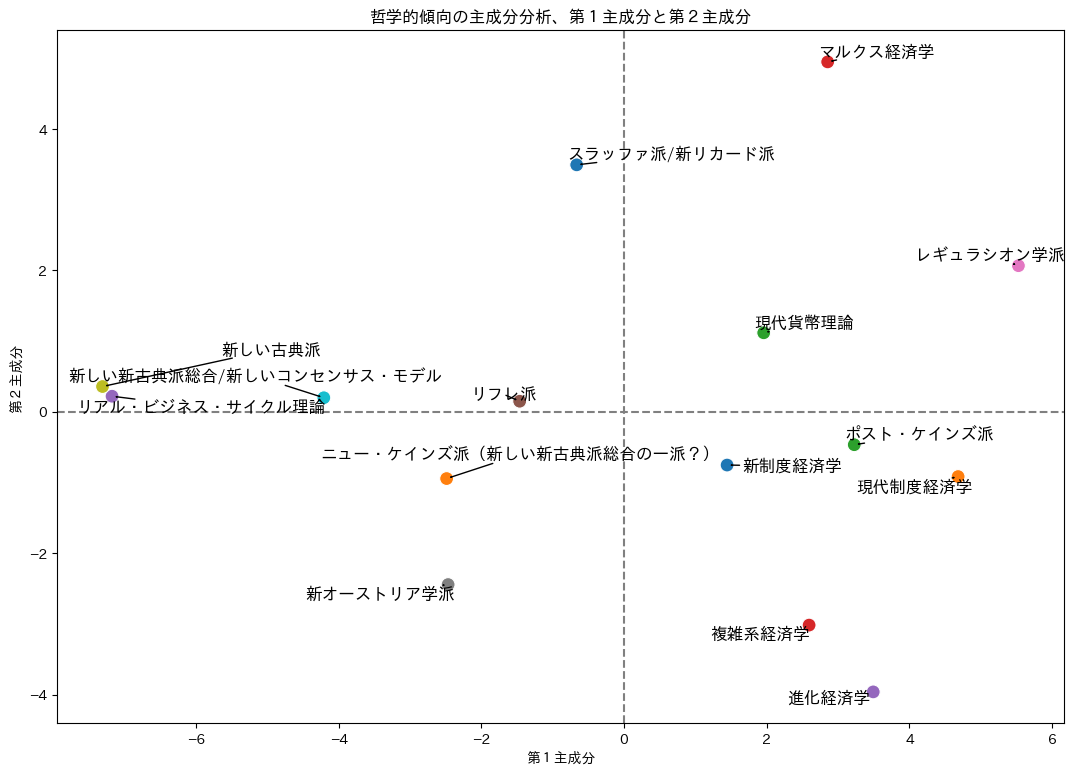

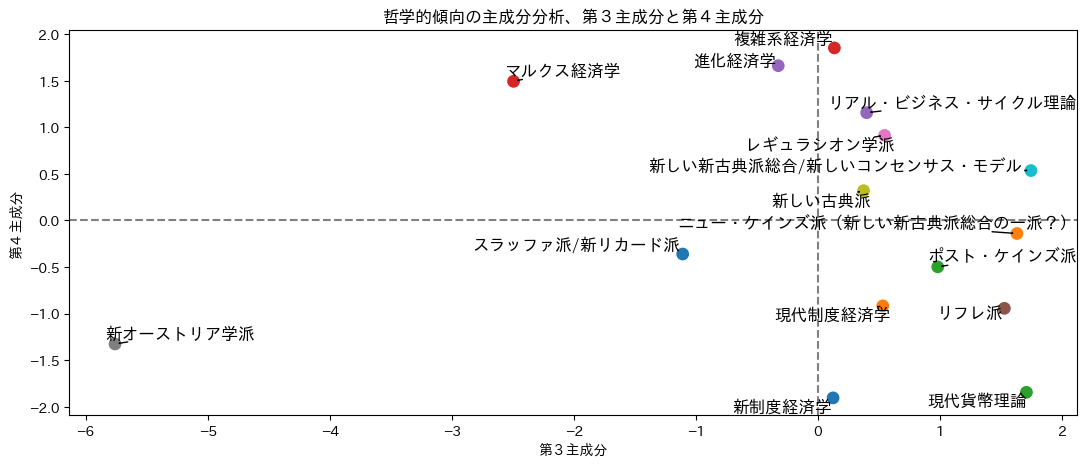

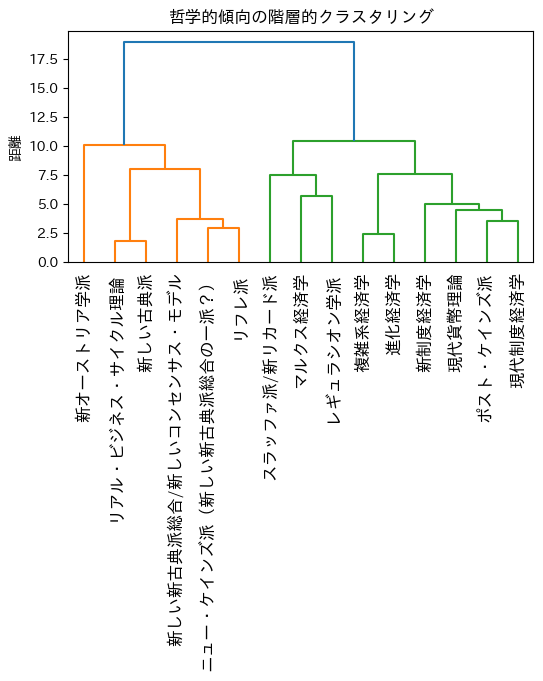

In [ ]:
df = pd.read_excel("philosophy_mini.ods", engine="odf", index_col=0)

# 標準化
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# PCAの実行（2次元）
pca = PCA(n_components=4)
pca_result = pca.fit_transform(df_scaled)

# 結果をデータフレームに格納
df_pca = pd.DataFrame(pca_result, columns=["PC1", "PC2", "PC3", "PC4"], index=df.index)

# PCAプロット
plt.figure(figsize=(13, 9))
sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], hue=df.index, palette="tab10", s=100,legend=False)
texts = [plt.text(x, y, label, fontsize=12, ha='right') for label, x, y in zip(df_pca.index, df_pca["PC1"], df_pca["PC2"])]
adjust_text(texts, arrowprops=dict(arrowstyle='->'))
plt.axhline(0, color='gray', linestyle='dashed')
plt.axvline(0, color='gray', linestyle='dashed')
plt.xlabel("第１主成分")
plt.ylabel("第２主成分")
plt.title("哲学的傾向の主成分分析、第１主成分と第２主成分")
plt.show()

plt.figure(figsize=(13, 5))
sns.scatterplot(x=df_pca["PC3"], y=df_pca["PC4"], hue=df.index, palette="tab10", s=100,legend=False)
texts = [plt.text(x, y, label, fontsize=12, ha='right') for label, x, y in zip(df_pca.index, df_pca["PC3"], df_pca["PC4"])]
adjust_text(texts, arrowprops=dict(arrowstyle='->'))
plt.axhline(0, color='gray', linestyle='dashed')
plt.axvline(0, color='gray', linestyle='dashed')
plt.xlabel("第３主成分")
plt.ylabel("第４主成分")
plt.title("哲学的傾向の主成分分析、第３主成分と第４主成分")
plt.show()

# クラスター分析（階層的クラスタリング）
linked = linkage(df_scaled, method='ward')

plt.figure(figsize=(6, 3))
dendrogram(linked, labels=df.index, leaf_rotation=90, leaf_font_size=12)
plt.title("哲学的傾向の階層的クラスタリング")
plt.ylabel("距離")
plt.show()


## 理論の前提の分析

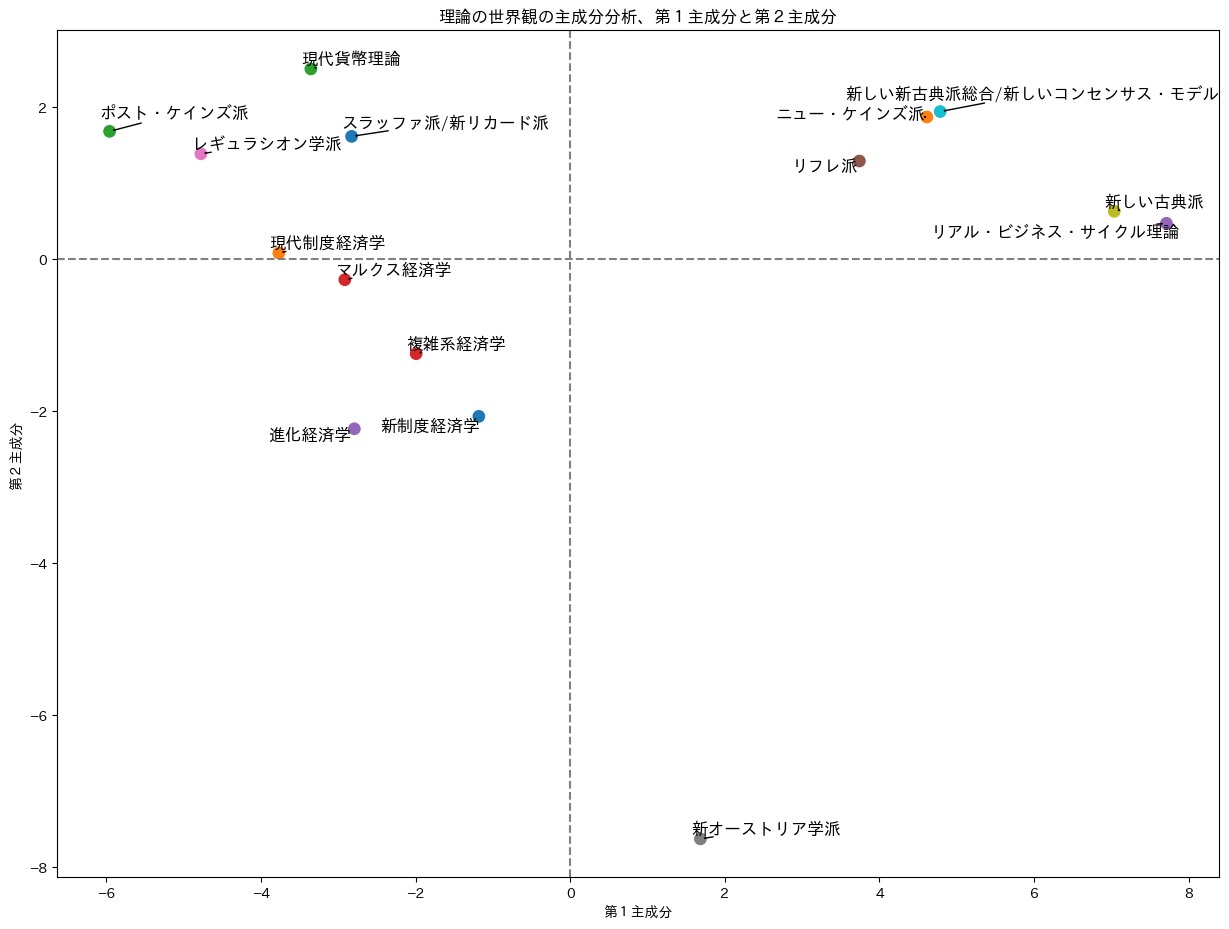

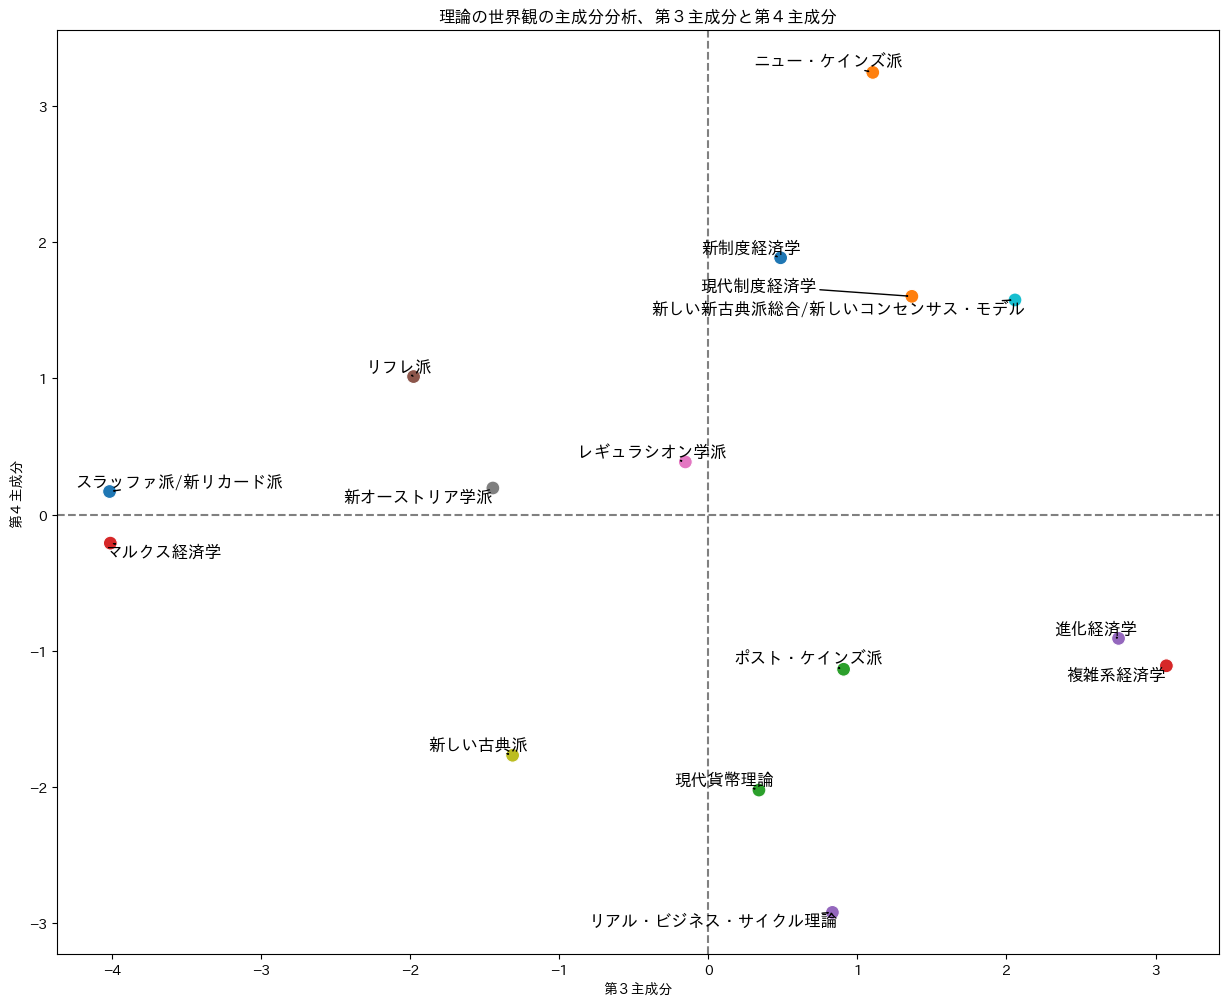

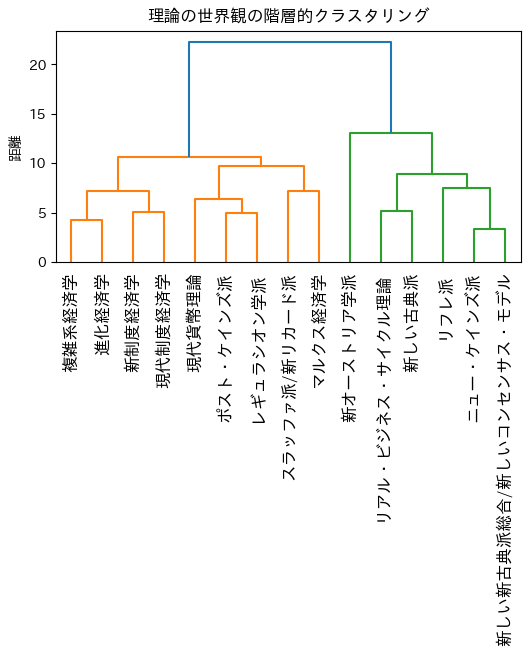

In [7]:
df = pd.read_excel("theory_mini.ods", engine="odf", index_col=0)

# 標準化
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# PCAの実行（４次元）
pca = PCA(n_components=4)
pca_result = pca.fit_transform(df_scaled)

# 結果をデータフレームに格納
df_pca = pd.DataFrame(pca_result, columns=["PC1", "PC2", "PC3", "PC4"], index=df.index)

# PCAプロット
plt.figure(figsize=(15, 11))
sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], hue=df.index, palette="tab10", s=100,legend=False)
texts = [plt.text(x, y, label, fontsize=12, ha='right') for label, x, y in zip(df_pca.index, df_pca["PC1"], df_pca["PC2"])]
adjust_text(texts, arrowprops=dict(arrowstyle='->'))
plt.axhline(0, color='gray', linestyle='dashed')
plt.axvline(0, color='gray', linestyle='dashed')
plt.xlabel("第１主成分")
plt.ylabel("第２主成分")
plt.title("理論の世界観の主成分分析、第１主成分と第２主成分")
plt.show()

plt.figure(figsize=(15, 12))
sns.scatterplot(x=df_pca["PC3"], y=df_pca["PC4"], hue=df.index, palette="tab10", s=100,legend=False)
texts = [plt.text(x, y, label, fontsize=12, ha='right') for label, x, y in zip(df_pca.index, df_pca["PC3"], df_pca["PC4"])]
adjust_text(texts, arrowprops=dict(arrowstyle='->'))
plt.axhline(0, color='gray', linestyle='dashed')
plt.axvline(0, color='gray', linestyle='dashed')
plt.xlabel("第３主成分")
plt.ylabel("第４主成分")
plt.title("理論の世界観の主成分分析、第３主成分と第４主成分")
plt.show()

# クラスター分析（階層的クラスタリング）
linked = linkage(df_scaled, method='ward')

plt.figure(figsize=(6,3))
dendrogram(linked, labels=df.index, leaf_rotation=90, leaf_font_size=12)
plt.title("理論の世界観の階層的クラスタリング")
plt.ylabel("距離")
plt.show()


# 活動が見られない学派と経済学以外まで含めて、もう一度

## 哲学的な傾向の分析

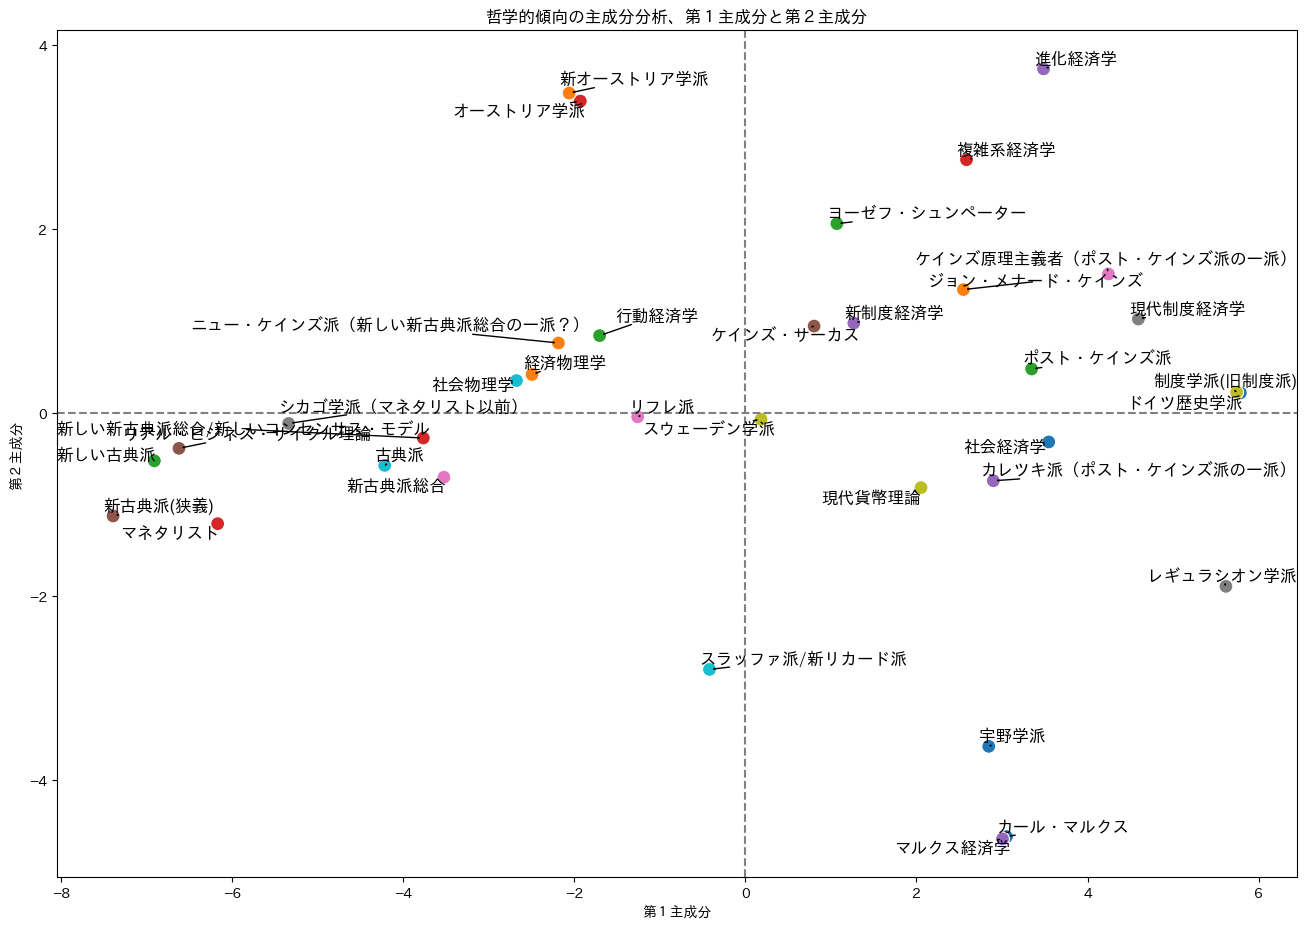

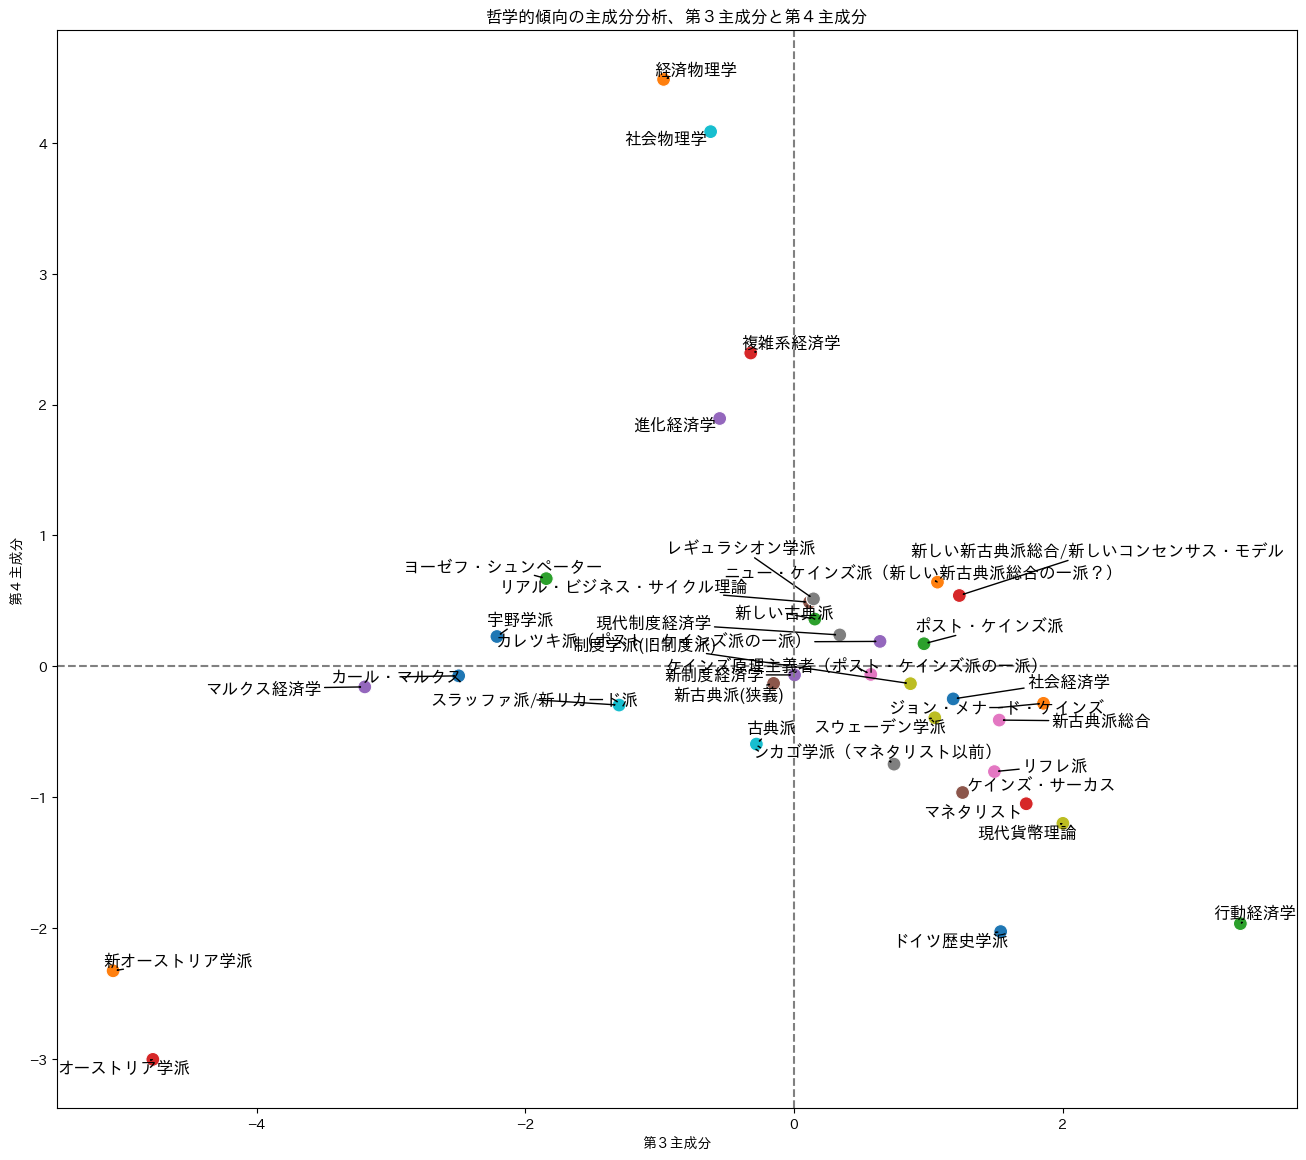

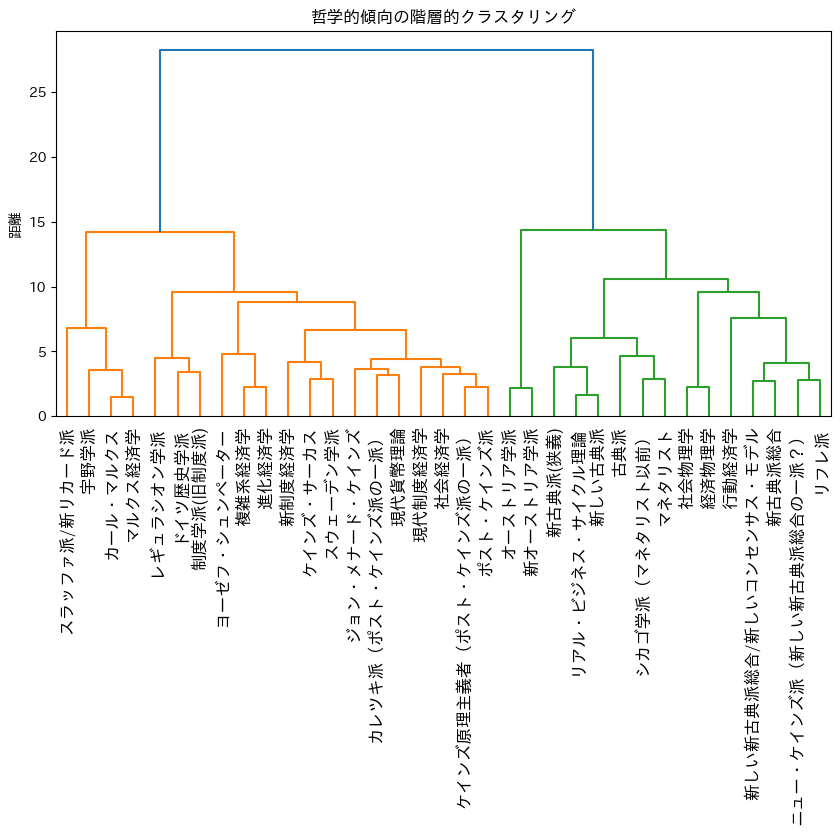

In [8]:
# データフレーム読み込み
df = pd.read_excel("philosophy.ods", engine="odf", index_col=0)

# 標準化
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# PCAの実行（４次元）
pca = PCA(n_components=4)
pca_result = pca.fit_transform(df_scaled)

# 結果をデータフレームに格納
df_pca = pd.DataFrame(pca_result, columns=["PC1", "PC2", "PC3", "PC4"], index=df.index)

# PCAプロット
plt.figure(figsize=(16, 11))
sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], hue=df.index, palette="tab10", s=100,legend=False)
texts = [plt.text(x, y, label, fontsize=12, ha='right') for label, x, y in zip(df_pca.index, df_pca["PC1"], df_pca["PC2"])]
adjust_text(texts, arrowprops=dict(arrowstyle='->'))
plt.axhline(0, color='gray', linestyle='dashed')
plt.axvline(0, color='gray', linestyle='dashed')
plt.xlabel("第１主成分")
plt.ylabel("第２主成分")
plt.title("哲学的傾向の主成分分析、第１主成分と第２主成分")
plt.show()

plt.figure(figsize=(16, 14))
sns.scatterplot(x=df_pca["PC3"], y=df_pca["PC4"], hue=df.index, palette="tab10", s=100,legend=False)
texts = [plt.text(x, y, label, fontsize=12, ha='right') for label, x, y in zip(df_pca.index, df_pca["PC3"], df_pca["PC4"])]
adjust_text(texts, arrowprops=dict(arrowstyle='->'))
plt.axhline(0, color='gray', linestyle='dashed')
plt.axvline(0, color='gray', linestyle='dashed')
plt.xlabel("第３主成分")
plt.ylabel("第４主成分")
plt.title("哲学的傾向の主成分分析、第３主成分と第４主成分")
plt.show()

# クラスター分析（階層的クラスタリング）
linked = linkage(df_scaled, method='ward')

plt.figure(figsize=(10,5))
dendrogram(linked, labels=df.index, leaf_rotation=90, leaf_font_size=12)
plt.title("哲学的傾向の階層的クラスタリング")
plt.ylabel("距離")
plt.show()


## 理論の前提の分析

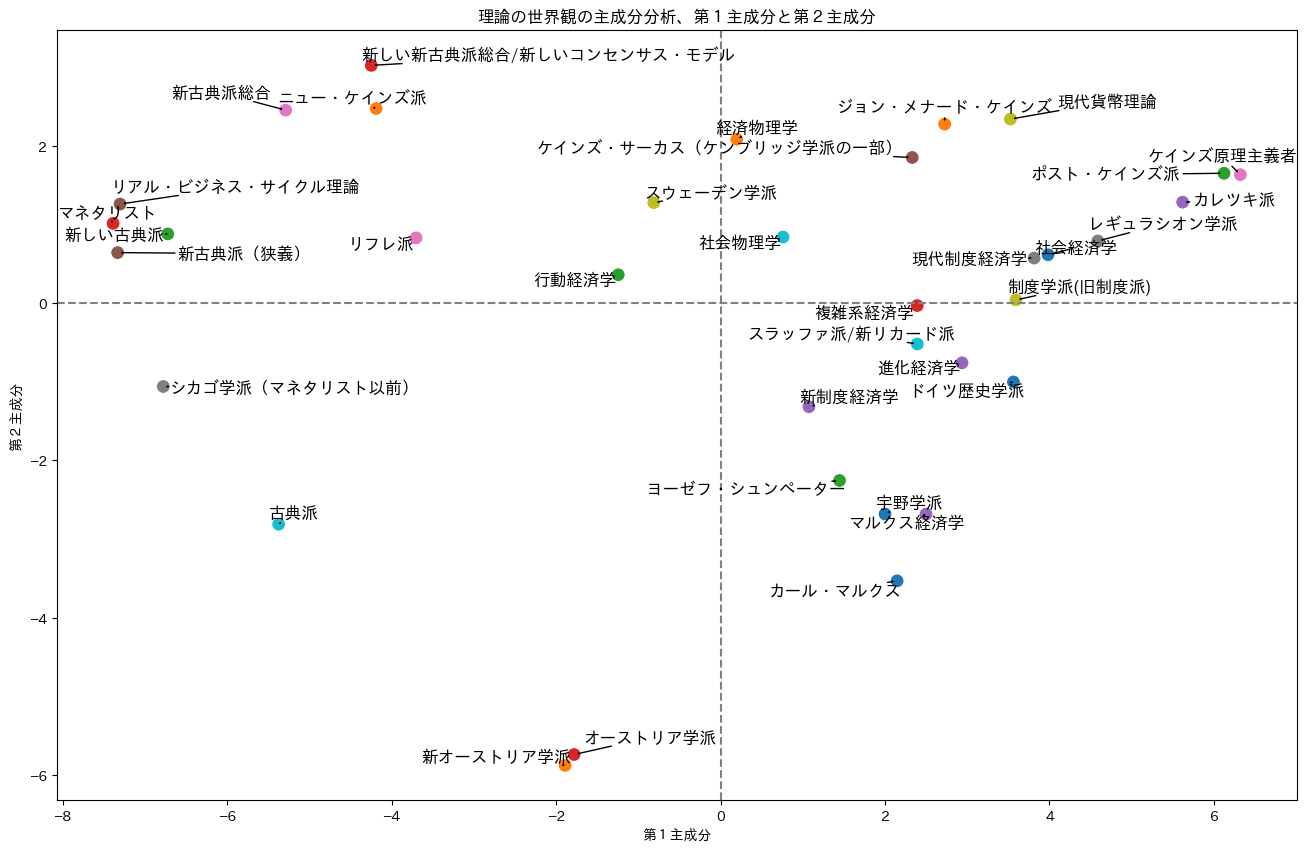

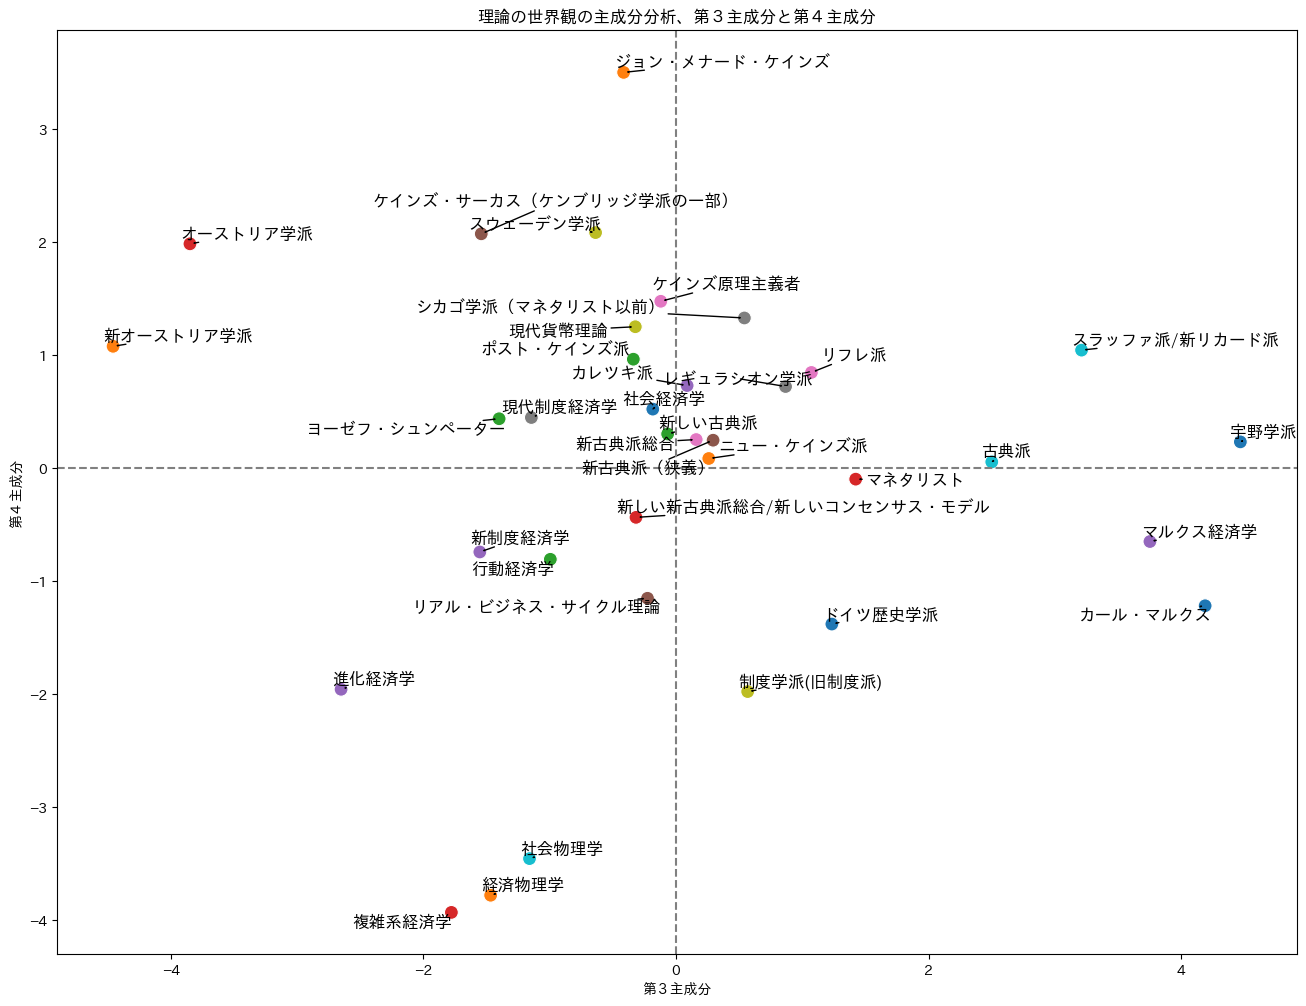

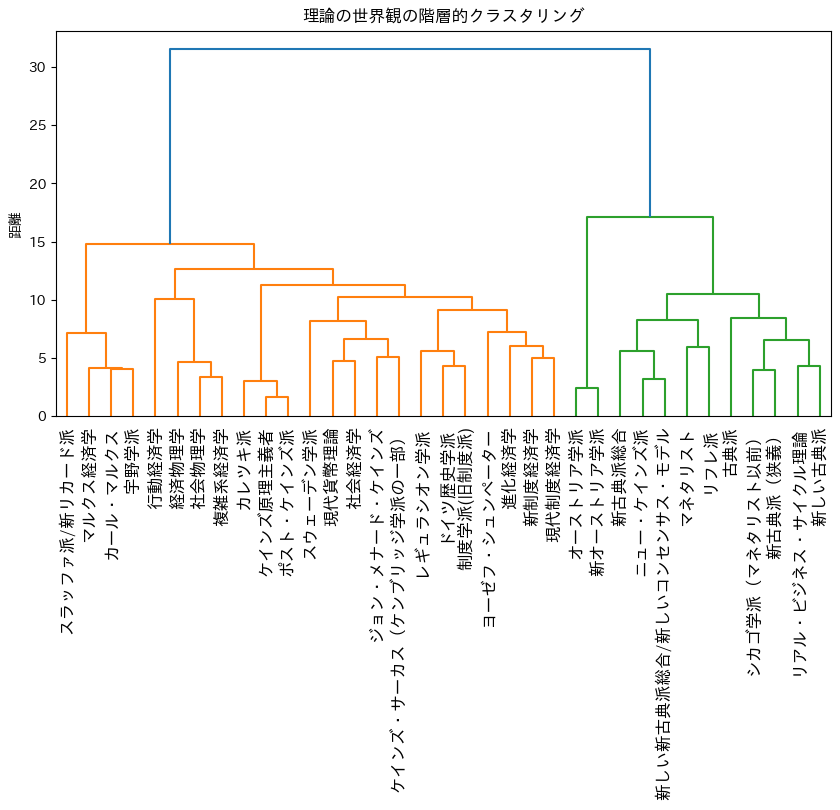

In [9]:
# データフレーム読み込み
df = pd.read_excel("theory.ods", engine="odf", index_col=0)

# 標準化
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# PCAの実行（4次元）
pca = PCA(n_components=4)
pca_result = pca.fit_transform(df_scaled)

# 結果をデータフレームに格納
df_pca = pd.DataFrame(pca_result, columns=["PC1", "PC2", "PC3", "PC4"], index=df.index)

# PCAプロット
plt.figure(figsize=(16, 10))
sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], hue=df.index, palette="tab10", s=100,legend=False)
texts = [plt.text(x, y, label, fontsize=12, ha='right') for label, x, y in zip(df_pca.index, df_pca["PC1"], df_pca["PC2"])]
adjust_text(texts, arrowprops=dict(arrowstyle='->'))
plt.axhline(0, color='gray', linestyle='dashed')
plt.axvline(0, color='gray', linestyle='dashed')
plt.xlabel("第１主成分")
plt.ylabel("第２主成分")
plt.title("理論の世界観の主成分分析、第１主成分と第２主成分")
plt.show()

plt.figure(figsize=(16, 12))
sns.scatterplot(x=df_pca["PC3"], y=df_pca["PC4"], hue=df.index, palette="tab10", s=100,legend=False)
texts = [plt.text(x, y, label, fontsize=12, ha='right') for label, x, y in zip(df_pca.index, df_pca["PC3"], df_pca["PC4"])]
adjust_text(texts, arrowprops=dict(arrowstyle='->'))
plt.axhline(0, color='gray', linestyle='dashed')
plt.axvline(0, color='gray', linestyle='dashed')
plt.xlabel("第３主成分")
plt.ylabel("第４主成分")
plt.title("理論の世界観の主成分分析、第３主成分と第４主成分")
plt.show()

# クラスター分析（階層的クラスタリング）
linked = linkage(df_scaled, method='ward')

plt.figure(figsize=(10,5))
dendrogram(linked, labels=df.index, leaf_rotation=90, leaf_font_size=12)
plt.title("理論の世界観の階層的クラスタリング")
plt.ylabel("距離")
plt.show()
